# Chapter 7 - Scientific Programming

In [1]:
using LinearAlgebra
A = [1 -2  2; 1 -1  2; -1  1  1];
det(A)

3.0

In [2]:
b = [5, 7, 5];
v = A\b

3-element Array{Float64,1}:
 1.0
 2.0
 4.0

In [3]:
transpose(v)

1×3 Transpose{Float64,Array{Float64,1}}:
 1.0  2.0  4.0

In [4]:
A1 = A[:, 2:3] 

3×2 Array{Int64,2}:
 -2  2
 -1  2
  1  1

In [5]:
(A1\b)' 

1×2 Adjoint{Float64,Array{Float64,1}}:
 1.27586  3.93103

In [6]:
A2 = A[1:2,:]; b2 = b[1:2];
(A2\b2)'

1×3 Adjoint{Float64,Array{Float64,1}}:
 1.8  2.0  3.6

### LU decomposition

In [7]:
Alu = lu(A)

LU{Float64,Array{Float64,2}}
L factor:
3×3 Array{Float64,2}:
  1.0   0.0  0.0
  1.0   1.0  0.0
 -1.0  -1.0  1.0
U factor:
3×3 Array{Float64,2}:
 1.0  -2.0  2.0
 0.0   1.0  0.0
 0.0   0.0  3.0

In [8]:
Alu.U # similar for the lower, i.e. Alu.L

3×3 Array{Float64,2}:
 1.0  -2.0  2.0
 0.0   1.0  0.0
 0.0   0.0  3.0

In [9]:
Alu.L*Alu.U  # => A (original matrix)

3×3 Array{Float64,2}:
  1.0  -2.0  2.0
  1.0  -1.0  2.0
 -1.0   1.0  1.0

In [14]:
Alu.P

3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [10]:
#=
Suppose we have equations:

 x - 2y + 2z = 5
 x -  y + 2z = 3
-x +  y + z  = 6

=#

b = [5; 3; 6];

# Ax = b => LUx = b :  x = inv(U)*inv(L)*b

(x,y,z) = inv(Alu.U)*inv(Alu.L)*b

3-element Array{Float64,1}:
 -5.0
 -2.0
  3.0

In [11]:
# Compute the eigenvalues of A
# (These are complex numbers)
U = eigvals(A)

3-element Array{Complex{Float64},1}:
 -0.2873715369435107 + 1.3499963980036567im
 -0.2873715369435107 - 1.3499963980036567im
  1.5747430738870216 + 0.0im               

In [12]:
# ... and the eigenvectors
V = eigvecs(A)

3×3 Array{Complex{Float64},2}:
   0.783249+0.0im         0.783249-0.0im       0.237883+0.0im
   0.493483-0.303862im    0.493483+0.303862im  0.651777+0.0im
 -0.0106833+0.22483im   -0.0106833-0.22483im   0.720138+0.0im

In [13]:
#=
The eigenvectors are the columns of the V matrix.
=#

A*V[:,1] - U[1]*V[:,1]

#=
That is, all the real and imaginary parts are of the e-16 order, 
so this is in effect a zero matrix of complex numbers.
=#

3-element Array{Complex{Float64},1}:
 -2.220446049250313e-16 + 2.220446049250313e-16im 
 1.1102230246251565e-16 + 0.0im                   
 2.7755575615628914e-16 - 1.3877787807814457e-16im

### Special matrices

In [2]:
A = [1 -2  2; 1 -1  2; -1  1  1];
Diagonal(diag(A))

3×3 Diagonal{Int64,Array{Int64,1}}:
 1   ⋅  ⋅
 ⋅  -1  ⋅
 ⋅   ⋅  1

In [8]:
diag(A)

3-element Array{Int64,1}:
  1
 -1
  1

In [3]:
n = 2000;
B = randn(n,n);
B1 = B + B';
B2 = copy(B1);
B2[1,2] += 1eps();
B2[2,1] += 2eps();
issymmetric(B1)'; # => true
issymmetric(B2)'; # => false

In [4]:
@time eigvals(B1);

  1.721057 seconds (902.89 k allocations: 74.717 MiB, 4.29% gc time)


In [6]:
@time eigvals(B2);

 15.516652 seconds (18 allocations: 31.099 MiB, 0.08% gc time)


In [7]:
@time eigvals(Symmetric(B2));

  2.804628 seconds (8.06 k allocations: 31.652 MiB, 0.46% gc time)


---

In [1]:
# Signal Processing
using PyPlot

In [2]:
fq = 500.0;
N = 512;
T = 6 / fq;
t = collect(range(0, stop=T, length=N));

x1 = sin.(2π * fq * t);
x2 = cos.(8π * fq * t);
x3 = cos.(16π * fq * t);
x = x1 + 0.4*x2 + 0.2*x3;

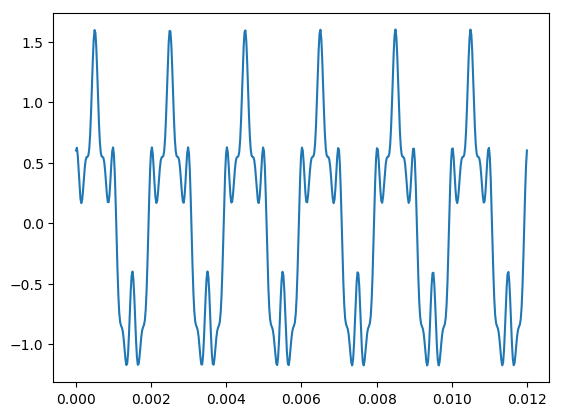

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x130bc90f0>

In [3]:
PyPlot.plot(t,x)

In [4]:
## using Pkg; Pkg.add("FFTW")
using FFTW

In [5]:
X = rfft(x)
sr = N / T

42666.666666666664

In [10]:
fd = collect(range(0, stop = sr/2, length = div(N,2) + 1))
yy = abs.(X);

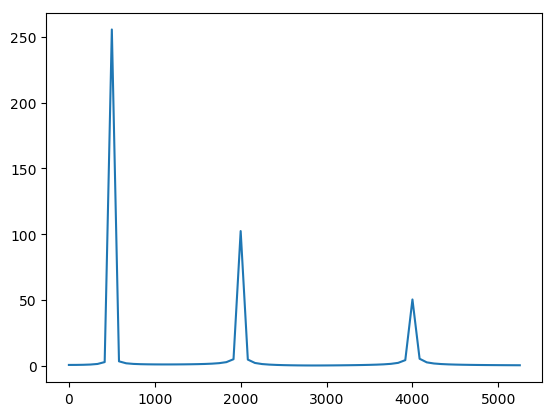

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x130c2f1d0>

In [8]:
plot(fd[1:64], yy[1:64])

┌ Info: Precompiling DSP [717857b8-e6f2-59f4-9121-6e50c889abd2]
└ @ Base loading.jl:1192


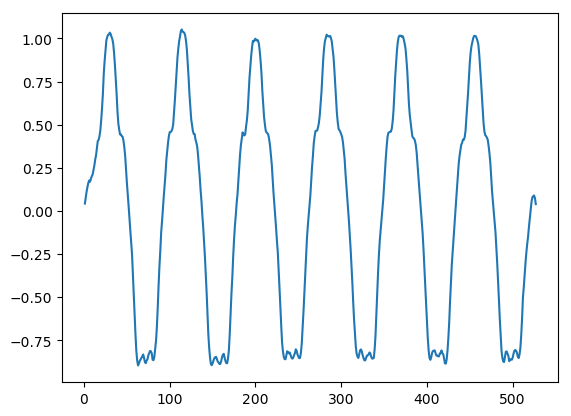

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1369d3208>

In [15]:
using DSP

ns = 0.1*randn(length(x));
xn = x + ns;
M = 16;
xm = ones(Float64, M) / M;
xf = conv(xn, xm)
plot(1:length(xf), xf)

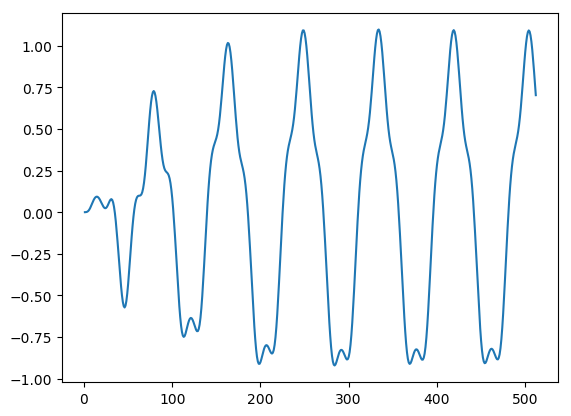

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12acacb00>

In [16]:
responsetype = Lowpass(0.2)

prototype = Elliptic(4, 0.5, 30)
tf = convert(TFFilter, digitalfilter(responsetype, prototype))

numerator_coefs   = coefb(tf)
denominator_coefs = coefa(tf)

responsetype = Bandpass(10, 40; fs=1000)
prototype = Butterworth(4)

xb = filt(digitalfilter(responsetype, prototype), x)›
plot(1:length(xb), xb)

---

In [11]:
# Image Processing

img = open("Files/lena.pgm");
magic  = chomp(readline(img));
params = chomp(readline(img));
pm = split(params)

# Remember the GSD 

try
  global wd = parse(Int64,pm[1]);
  global ht = parse(Int64,pm[2]);
catch
  error("Can't figure out the image dimensions")
end

# Version 1.0 way of defining a byte array
# readbytes!() will read in place

data = Array{UInt8,2}(undef,wd,ht)
readbytes!(img, data, wd*ht);

data = reshape(data,wd,ht);
close(img);


In [18]:
# Define a convolution mask

Gx = [1 2 1; 0 0 0; -1 -2 -1];
Gy = [1 0 -1; 2 0 -2; 1 0 -1];

dout = copy(data);
for i = 2:wd-1
  for j = 2:ht-1
    temp = data[i-1:i+1, j-1:j+1];
    x = sum(Gx.*temp)
    y = sum(Gy.*temp)
    p = Int64(floor(sqrt(x*x + y*y)))
    dout[i,j] = (p < 256) ? UInt8(p) : 0xff
  end
end

# ... and output the result
out = open("Files/lenaX.pgm","w");
println(out,magic);
println(out,params);
write(out,dout);
close(out);

# This only works if you have Imagemagick (or similar) installed
run(`display Files/lenaX.pgm`);

---

## Ordinary Differential Equations


In [13]:
using Plots; gr()

Plots.GRBackend()

In [2]:
# http://docs.juliadiffeq.org/latest/

#=
OrdinaryDiffEq.jl is part of the JuliaDiffEq common interface, 
but can be used independently of DifferentialEquations.jl. 

User passes to OrdinaryDiffEq.jl an algorithm to solve
=#

using OrdinaryDiffEq

function ff(d,u,p,t)
  d[1] =  p[1]*u[1] - p[2]*u[1]*u[2]
  d[2] = -p[3]*u[2] + p[4]*u[1]*u[2] - p[5]*u[2]*u[3]
  d[3] = -p[6]*u[3] + p[7]*u[2]*u[3]
end

ff (generic function with 1 method)

In [3]:
           
u0 = [0.5; 1.0; 2.0];    # Setup the initial conditions
tspan = (0.0,10.0);       # and the time range


#=
In OrdinaryDiffEq.jl, some good "go-to" choices for ODEs are:

AutoTsit5(Rosenbrock23()) handles both stiff and non-stiff equations. This is a good algorithm to use if you know nothing about the equation.
BS3() for fast low accuracy non-stiff.
Tsit5() for standard non-stiff. This is the first algorithm to try in most cases.
Vern7() for high accuracy non-stiff.
Rodas4() for stiff equations with Julia-defined types, events, etc.
radau() for really high accuracy stiff equations (requires installing ODEInterfaceDiffEq.jl)

=#

prob = ODEProblem(ff,u0,tspan)


ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [0.5, 1.0, 2.0]

In [5]:
u = solve(prob, Tsit5());

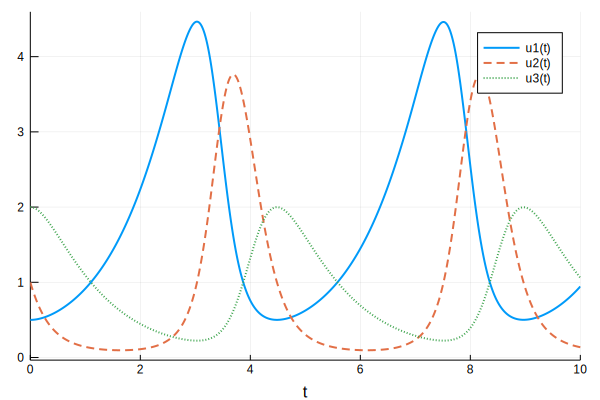

In [7]:
# Plot API will plot the array
using Plots

styles = [:solid; :dash; :dot]
N = length(styles)
styles = reshape(styles, 1, N)  # styles is now a 1xN Vector

Plots.plot(u, line = (2,styles))

In [ ]:
# Modify the system to allow the first species to eat the third

function fg(d,u,p,t)
  d[1] =  p[1]*u[1] - p[2]*u[1]*u[2] - p[8]*u[1]*u[3]
  d[2] = -p[3]*u[2] + p[4]*u[1]*u[2] - p[5]*u[2]*u[3]
  d[3] = -p[6]*u[3] + p[7]*u[2]*u[3]
end

### Non-linear ODEs

In [ ]:
using Sundials

$\dfrac{d\theta}{dt} = e^{-a\theta} - b\theta$

In [25]:
function exotherm(t, x, dx; n=1, a=1, b=1)
  p = x[2]^n * exp(x[1])
  dx[1] = p - a*x[1]
  dx[2] = -b*p
  return(dx)
end

exotherm (generic function with 1 method)

In [26]:
t = collect(range(0.0; stop=5.0,length=1001))
fexo(t,x,dx) = exotherm(t, x, dx, a=0.6, b=0.1)
x1 = Sundials.cvode(fexo, [0.0, 1.0], t)

1001×2 Array{Float64,2}:
 0.0         1.0        
 0.00500386  0.999499   
 0.0100153   0.998995   
 0.0150347   0.99849    
 0.0200619   0.997982   
 0.025097    0.997471   
 0.0301408   0.996959   
 0.0351927   0.996444   
 0.0402527   0.995926   
 0.0453208   0.995407   
 0.0503972   0.994885   
 0.0554832   0.99436    
 0.0605777   0.993833   
 ⋮                      
 1.08505     0.000133012
 1.0818      0.000133438
 1.07857     0.000133865
 1.07534     0.000134292
 1.07213     0.000134719
 1.06892     0.000135147
 1.06572     0.000135575
 1.06253     0.000136003
 1.05935     0.000136432
 1.05618     0.000136862
 1.05301     0.000137291
 1.04986     0.000137722

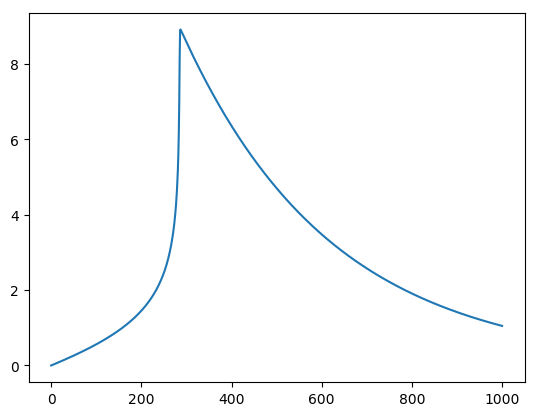

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13c7c4eb8>

In [29]:
PyPlot.plot(x1[:,1])

---

In [30]:
using Roots, Printf

f(x,a) = exp(x) - a*x

for p = 2.8:-0.02:2.6
  try
    ff(x) = f(x,p) 
    @printf "%.2f : %.5f\n" p find_zero(ff,1.0)
  catch
    error("No convergence for parameter value: $p")
  end
end

# There is no solution for a <= exp(1) => 2.7182 .....

2.80 : 0.77594
2.78 : 0.80279
2.76 : 0.83547
2.74 : 0.87909
2.72 : 0.96487


ErrorException: No convergence for parameter value: 2.7

---

## A Touch of Chaos

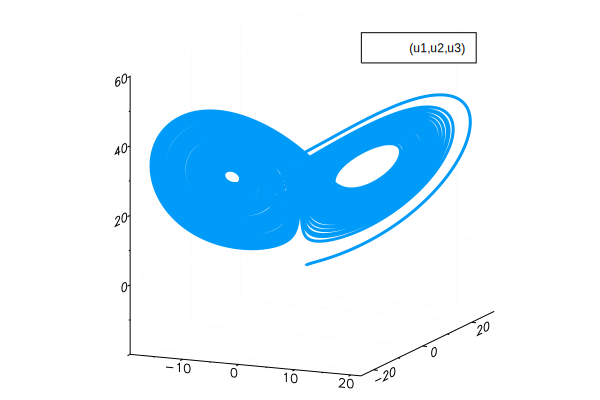

In [7]:
using Plots,OrdinaryDiffEq, Sundials

function lorenz(du,u,p,t)
 du[1] = 10.0(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz,u0,tspan)
sol = solve(prob,CVODE_Adams())
Plots.plot(sol,vars=(1,2,3))

---

### The Differential Equation Framework

In [9]:
using DifferentialEquations

In [10]:
f(du,u,p,t) = (du .= u)
g(du,u,p,t) = (du .= u)

u0 = rand(4,2)

4×2 Array{Float64,2}:
 0.214245   0.0871453
 0.178863   0.281525 
 0.0713657  0.454803 
 0.420867   0.920406 

In [11]:
W = WienerProcess(0.0,0.0,0.0);

In [12]:
prob = SDEProblem(f,g,u0,(0.0,1.0),noise=W)
sol = solve(prob,SRIW1())

retcode: Success
Interpolation: 1st order linear
t: 57-element Array{Float64,1}:
 0.0                   
 0.00040263897561797007
 0.0008487816402937781 
 0.0013506921380540622 
 0.0019153414480343818 
 0.0025505719217622414 
 0.0032652062047060833 
 0.004069169773017906  
 0.004973628787368706  
 0.005991145178513356  
 0.007135851118551088  
 0.008423645301093536  
 0.00987241375645379   
 ⋮                     
 0.5307392259700222    
 0.5741903912724953    
 0.620122006443789     
 0.6717950735114945    
 0.7101132639944658    
 0.7532212282878087    
 0.7955064317882351    
 0.841213739791668     
 0.89263446129553      
 0.9504827729873748    
 0.9807961162400013    
 1.0                   
u: 57-element Array{Array{Float64,2},1}:
 [0.214245 0.0871453; 0.178863 0.281525; 0.0713657 0.454803; 0.420867 0.920406] 
 [0.216546 0.088081; 0.180784 0.284548; 0.072132 0.459687; 0.425386 0.930289]   
 [0.224092 0.0911503; 0.187083 0.294464; 0.0746456 0.475705; 0.440209 0.962706] 
 [0.226788 

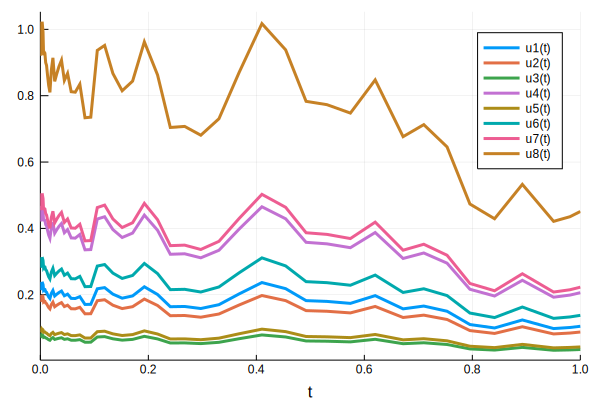

In [13]:
# using Plots
# gr()
Plots.plot(sol)

In [16]:
function f(du,u,p,t)
  du[1] = u[1]
end

prob = ODEProblem(f,[0.2],(0.0,10.0))

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [0.2]

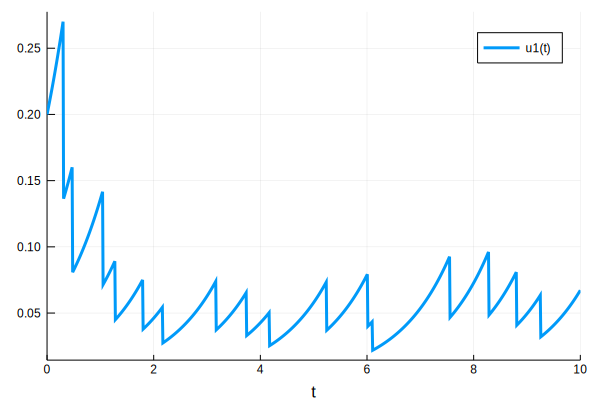

In [18]:
rate(u,p,t) = 2
affect!(integrator) = (integrator.u[1] = integrator.u[1]/2)
jump = ConstantRateJump(rate,affect!)
jump_prob = JumpProblem(prob,Direct(),jump)

sol = solve(jump_prob,Tsit5())
Plots.plot(sol)

---

## Calculus
### Differentiation

In [41]:
using Calculus

In [42]:
f(x)=sin(x)*cos(x)
derivative(f,1.0)

-0.41614683653632545

In [43]:
# Check since d(f) => cos*cos - sin*sin
cos(1.0)^2 - sin(1.0)^2

-0.4161468365471423

In [44]:
# Possible to curry the function
df = derivative(f)
df(1.0)

-0.41614683653632545

In [45]:
# Also defined is the 2nd derivative
d2f = second_derivative(f)
d2f(1.0)

-1.8185953905296441

In [46]:
# Also can use tick notation forhigher derivatives
# e.g. Value of the 3rd derivative
f'''(1.0)

1.7473390557101791

In [47]:
#
# There are 2D functions, argument is a N-vector
# Be careful of name clashes
#
h(x) = (1+x[1])*exp(x[1])*sin(x[2])*cos(x[2])
gd=Calculus.gradient(h)
gd([1.0,1.0])

2-element Array{Float64,1}:
  3.7075900080760276
 -2.262408767426671 

In [48]:
hs = Calculus.hessian(h)
hs([1.0,1.0])

2×2 Array{Float64,2}:
  4.94345  -3.39361
 -3.39361  -9.88691

### Prime Notation

In [29]:
f(x) = sin(x)*cos(x)

f (generic function with 2 methods)

In [30]:
f'(1.0)

-0.41614683653632545

In [32]:
# Check
cos(1.0)^2 - sin(1.0)^2

-0.4161468365471423

In [33]:
f''(1.0)

-1.8185953905296441

In [39]:
f'''(1.0)

1.7473390557101791

In [38]:
f''''(1.0)

5505.591834126032

### Symbolic differentiation

In [49]:
# It is possible to output the symbolic version of the derivate
differentiate("sin(x)*cos(x)", :x)

:((1 * cos(x)) * cos(x) + sin(x) * (1 * -(sin(x))))

In [50]:
# Not that clear but can be simplfied somewhat
# ... although not entirely perfect.
simplify(differentiate("sin(x)*cos(x)", :x)) 

:(cos(x) * cos(x) + sin(x) * -(sin(x)))

In [51]:
# These techniques work more than a single variable too
# We get a 2-D array of partial derivatives
# Clearly the terms with a '0' multiplier can be ignored
#
simplify(differentiate("x*exp(-x)*sin(y)", [:x, :y]))

2-element Array{Any,1}:
 :(1 * exp(-x) * sin(y) + x * (-1 * exp(-x)) * sin(y) + x * exp(-x) * 0)
 :(0 * exp(-x) * sin(y) + x * 0 * sin(y) + x * exp(-x) * (1 * cos(y)))  

---

### Automatic differentiation

In [40]:
struct D <: Number
  d1::Float64
  d2::Float64
end

import Base: +, /, convert, promote_rule
+(x::D, y::D) = D(x.d1+y.d1, x.d2+y.d2)
/(x::D, y::D) = D(x.d1/y.d1, (y.d1*x.d2 - x.d1*y.d2)/y.d1^2)
convert(::Type{D}, x::Real) = D(x,zero(x))
promote_rule(::Type{D}, ::Type{<:Number}) = D

da = D(17,1)

D(17.0, 1.0)

In [41]:
function hero(x; k::Integer = 10)
  @assert k > 0
  t = (1+x)/2
  for i = 2:k
    t = (t + x/t)/2
  end
  return t
end

# Call the function with the D() structure.
db = hero(da)

D(4.123105625617661, 0.12126781251816648)

In [45]:
db.d1^2   # Confirm the solution

17.0

In [46]:
# How does this work?
# Decode it without the 'dual' number

using Printf
function dhero(x; k = 10) 
    t  = (1+x)/2
    dt = 1
    @printf "%3d : %.5f : %.5f\n" 1 t dt
    for i = 2:k;  
        t  = (t+x/t)/2; 
        dt = (dt + (t - x*dt)/t^2)/2; 
        @printf "%3d : %.5f : %.5f\n" i t dt
    end    
    (t,dt)
end

dhero(17, k=5)

  1 : 9.00000 : 1.00000
  2 : 5.44444 : 0.30508
  3 : 4.28345 : 0.12793
  4 : 4.12611 : 0.12127
  5 : 4.12311 : 0.12127


(4.123106716962795, 0.12126781251943676)

---

### Forward Differences

In [1]:
using ForwardDiff

u = [1.1,2.2,3.3]
f(x::Vector) = sqrt(sum(x.*x));
f(u)   # =~ sqrt(16.94)

4.115823125451335

In [3]:
ForwardDiff.gradient(f, u)

3-element Array{Float64,1}:
 0.26726124191242445
 0.5345224838248489 
 0.8017837257372732 

In [4]:
ForwardDiff.hessian(f, u)

3×3 Array{Float64,2}:
  0.22561    -0.0347093  -0.0520639
 -0.0347093   0.173546   -0.104128 
 -0.0520639  -0.104128    0.0867731

In [5]:
function tensor(f, x)
  n = length(x)
  out = ForwardDiff.jacobian(y -> ForwardDiff.hessian(f, y), x)
  return reshape(out, n, n, n)
end

tensor(f, u)

3×3×3 Array{Float64,3}:
[:, :, 1] =
 -0.04395    -0.0247923   -0.0371885
 -0.0247923  -0.00225385   0.0202846
 -0.0371885   0.0202846    0.01465  

[:, :, 2] =
 -0.0247923   -0.00225385   0.0202846 
 -0.00225385  -0.0676154   -0.00676154
  0.0202846   -0.00676154   0.0293    

[:, :, 3] =
 -0.0371885   0.0202846    0.01465  
  0.0202846  -0.00676154   0.0293   
  0.01465     0.0293      -0.0507116

---

### Symbolic output using SymPy 

In [49]:
using SymPy

In [50]:
# Display Hero's first 4 terms
# Gets a little complex after that, try upping M!

M = 4
x = symbols("x")
for i = 1:M
  display(simplify(heron(x, k = i )))
end

x   1
─ + ─
2   2

           2
    (x + 1) 
x + ────────
       4    
────────────
   x + 1    

 4       3       2           
x  + 28⋅x  + 70⋅x  + 28⋅x + 1
─────────────────────────────
     ⎛ 3      2          ⎞   
   8⋅⎝x  + 7⋅x  + 7⋅x + 1⎠   

 8        7         6         5          4         3         2            
x  + 120⋅x  + 1820⋅x  + 8008⋅x  + 12870⋅x  + 8008⋅x  + 1820⋅x  + 120⋅x + 1
──────────────────────────────────────────────────────────────────────────
         ⎛ 7       6        5        4        3        2           ⎞      
      16⋅⎝x  + 35⋅x  + 273⋅x  + 715⋅x  + 715⋅x  + 273⋅x  + 35⋅x + 1⎠      

### Quadratures

In [51]:
using QuadGK
f(x) = sin(x)*(1.0 + cos(x))
quadgk(f,0.0,1.0)

(0.813734403268646, 2.220446049250313e-16)

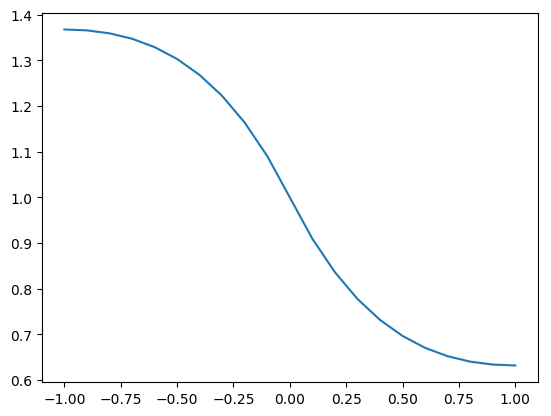

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1672ca320>

In [52]:
#=
Addition function gives points and weights over the interval [-1,1]
Pick a sigmodial function : 1 - x exp(-|x|)
=#
g(u) = 1 - u*exp(-abs(u))

using PyPlot
x = collect(-1.0:0.1:1.0)
y = g.(x)
PyPlot.plot(x,y)

In [53]:
# The gauss() function creates a tuple of N array of points and weights
(x,w) = gauss(20)
s = sum([w[i]*g(x[i]) for i = 1:20])

2.0000000000000004

In [55]:
# Alternate package which will do multidimension quadratutes
# Written by Steven Johnson (of PyCall, IJulia, etc. )
# It also does 1-D integration

using HCubature
hquadrature(f,0.0,1.0)

(0.813734403268646, 2.220446049250313e-16)

In [57]:
# But the power is the n-D quadratures
# Notice that the function expects an array argument

h(x) = 2.0*x[1]*exp(-x[1])*sin(x[2])*cos(x[2])
hcubature(h, [0,0], [1,1])

(0.18710211142604422, 2.598018441709888e-9)

---

## Optimisation

In [59]:
# Add JuMP#master to get v0.19

using JuMP, Clp

In [60]:
#=
Maximize the 5x+3y function subject to the constraint that: 3x+5y < 7
=#
m = Model(with_optimizer(Clp.Optimizer))

@variable(m, 0 <= x <= 5 );
@variable(m, 0 <= y <= 10 );

@objective(m, Max, 5x + 3y );
@constraint(m, 2x + 5y <= 7.0 );

In [61]:
JuMP.optimize!(m)

Coin0506I Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
Clp0006I 0  Obj -0 Dual inf 15.5 (2)
Clp0006I 1  Obj 17.5
Clp0000I Optimal - objective value 17.5
Clp0032I Optimal objective 17.5 - 1 iterations time 0.002


In [62]:
println("x = ", JuMP.value(x), " y = ", JuMP.value(y))

x = 3.5000000000000004 y = 0.0


In [63]:
JuMP.objective_value(m)

17.500000000000004

### Knapsack problem

In [64]:
using JuMP, LinearAlgebra, Printf

N = 6;
m = Model()
@variable(m, x[1:N], Bin);      # Define array variable to hold results
profit = [ 5, 3, 2, 7, 4, 4 ];  # Profit vector of size N
weight = [ 2, 8, 4, 2, 5, 6 ];  # Weights vector of size 

maxcap = 15;

@objective(m, Max, dot(profit, x));
@constraint(m, dot(weight, x) <= maxcap);


In [65]:
using GLPK
JuMP.optimize!(m, with_optimizer(GLPK.Optimizer))

In [66]:
println("Objective is : ", JuMP.objective_value(m))
println("\nSolution is :")

for i = 1:N
    print("\tx[$i] = ", JuMP.value(x[i]))
    println(", p[$i]/w[$i] = ", profit[i]/weight[i])
end

Objective is : 20.0

Solution is :
	x[1] = 1.0, p[1]/w[1] = 2.5
	x[2] = 0.0, p[2]/w[2] = 0.375
	x[3] = 0.0, p[3]/w[3] = 0.5
	x[4] = 1.0, p[4]/w[4] = 3.5
	x[5] = 1.0, p[5]/w[5] = 0.8
	x[6] = 1.0, p[6]/w[6] = 0.6666666666666666


---

### Optim

In [68]:
using Optim

In [69]:
rosenbrock(x) =  (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
result = Optim.optimize(rosenbrock, zeros(2), BFGS())

Results of Optimization Algorithm
 * Algorithm: BFGS
 * Starting Point: [0.0,0.0]
 * Minimizer: [0.9999999926033423,0.9999999852005353]
 * Minimum: 5.471433e-17
 * Iterations: 16
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: false 
     |x - x'| = 3.47e-07 
   * |f(x) - f(x')| ≤ 0.0e+00 |f(x)|: false
     |f(x) - f(x')| = 1.20e+03 |f(x)|
   * |g(x)| ≤ 1.0e-08: true 
     |g(x)| = 2.33e-09 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 53
 * Gradient Calls: 53

In [70]:
# Look at some values across a diagonal (x[1] == x[2]) cut
#
using Printf
for x in 0.0:0.1:1.5
  @printf "%3.1f : %f\n" x rosenbrock([x,x])
end

0.0 : 1.000000
0.1 : 1.620000
0.2 : 3.200000
0.3 : 4.900000
0.4 : 6.120000
0.5 : 6.500000
0.6 : 5.920000
0.7 : 4.500000
0.8 : 2.600000
0.9 : 0.820000
1.0 : 0.000000
1.1 : 1.220000
1.2 : 5.800000
1.3 : 15.300000
1.4 : 31.520000
1.5 : 56.500000


---

## Stochastic Simulations 

In [13]:
using SimJulia, ResumableFunctions
using Distributions
using Printf, Random

In [14]:
NUM_CUSTOMERS = 16     # total number of customers generated
NUM_TELLERS   = 2      # number of servers
QUEUE_MAX     = 2      # Maximum size of queue

μ = 0.4                # service rate
λ = 0.9                # arrival rate

arrival_dist = Exponential(1/λ)  # interarrival time distriubtion
service_dist = Exponential(1/μ)  # service time distribution

seed = ccall((:clock,"libc"),Int32,())
Random.seed!(seed);

In [15]:
queue_length = 0;
queue_stack  = Array{Integer,1}(undef,0);

@resumable function visit(env::Environment, 
                        teller::Resource, 
                        id::Integer, 
                        time_arrvl::Float64, 
                        dist_serve::Distribution)

# customer arrives
# recall the crazy scoping rules, we can see the array but not the scalar
#
    global queue_length
    @yield timeout(env, time_arrvl)
    @printf "Customer %2d %15s : %.3f\n" id "arrives" now(env)
    if queue_length > 0
        push!(queue_stack,id)
        println("CHECK: Length of the queue is $queue_length")
    end
    queue_length += 1
# customer starts to be served
    @yield request(teller)
    queue_length -= 1
    @printf "Customer %2d %15s : %.3f\n" id "being served" now(env) 
#  teller is busy
    @yield timeout(env, rand(dist_serve)) 
# customer leaves
    @yield release(teller) 
    @printf "Customer %2d %15s : %.3f\n" id "leaves" now(env)
end

visit (generic function with 1 method)

In [16]:
# initialize simulation <: environment
sim     = Simulation()  

# initialize service resources
service = Resource(sim, NUM_TELLERS) 

# initialize customers and set arrival time
# customers arrive randomly baed on Poisson distribution
arrival_time = 0.0
for i = 1:NUM_CUSTOMERS 
    arrival_time += rand(arrival_dist)
    @process visit(sim, service, i, arrival_time, service_dist)
end

# run the simulation
run(sim)

Customer  1         arrives : 0.492
Customer  1    being served : 0.492
Customer  2         arrives : 1.484
Customer  2    being served : 1.484
Customer  3         arrives : 2.148
Customer  1          leaves : 3.784
Customer  3    being served : 3.784
Customer  2          leaves : 5.943
Customer  4         arrives : 6.323
Customer  4    being served : 6.323
Customer  5         arrives : 6.335
Customer  3          leaves : 7.092
Customer  5    being served : 7.092
Customer  4          leaves : 8.095
Customer  6         arrives : 8.123
Customer  6    being served : 8.123
Customer  5          leaves : 9.034
Customer  7         arrives : 9.860
Customer  7    being served : 9.860
Customer  8         arrives : 10.718
Customer  9         arrives : 11.957
CHECK: Length of the queue is 1
Customer 10         arrives : 13.250
CHECK: Length of the queue is 2
Customer  6          leaves : 13.291
Customer  8    being served : 13.291
Customer 11         arrives : 14.107
CHECK: Length of the queue is 

In [17]:
# Check on which customers had to wait
queue_stack

7-element Array{Integer,1}:
  9
 10
 11
 13
 14
 15
 16